In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
import numpy as np
import math

In [13]:
x = np.array([1, 0, 0, 0])
y = np.fft.fft(x, norm='ortho')
print(y)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


In [14]:
x = np.fft.ifft(y, norm='ortho')
print(x)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


{'00': 1024}


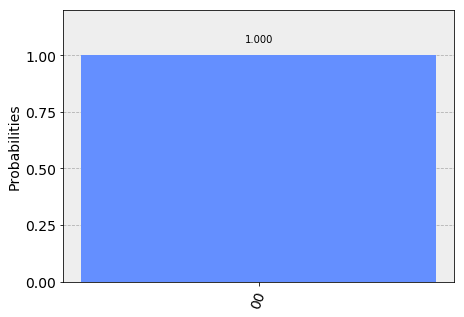

In [15]:
def qft(qc,qr,n):
    for i in range(n):
        for j in range(i):
            qc.cu1(math.pi/float(2**(i-j)), qr[i], qr[j])
        qc.h(qr[i])
        
qx = QuantumRegister(2)
qy = QuantumRegister(1)
c = ClassicalRegister(2, "c")
qc = QuantumCircuit(qx, qy, c, name="qft_2q")

#qc.x(qx[0])
#qc.x(qx[1])

qc.h(qx)
qc.x(qy)
qc.h(qy)

qft(qc,qx,2)

qc.swap(qx[0], qx[1])

qc.measure(qx, c)

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

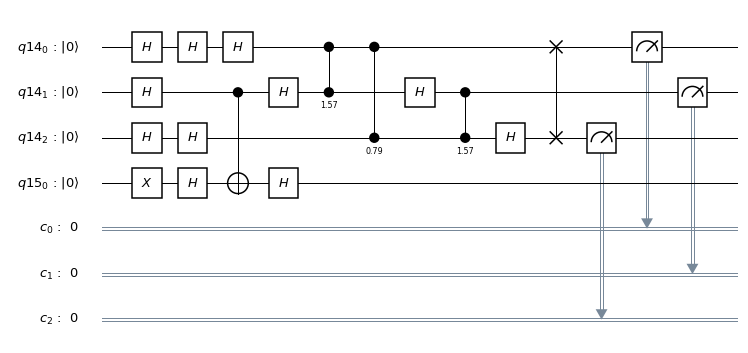

In [14]:
qc.draw(output='mpl', plot_barriers=False)

In [ ]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

In [ ]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_athens')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [ ]:
result_exp = job_exp.result()
print(result_exp)

In [ ]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [ ]:
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))

In [57]:
#job_get=backend.retrieve_job(jobID)
#job_get.result().get_counts(qc)

In [58]:
api = IBMQuantumExperience(token)
api.get_my_credits()

{'maxUserType': 15, 'promotional': 0, 'remaining': 15}

In [8]:
#api.get_last_codes()

In [33]:
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q18[4];
qreg q19[1];
creg c[4];
h q18[0];
h q18[1];
h q18[2];
h q18[3];
x q19[0];
h q19[0];
cx q18[0],q19[0];
cx q18[2],q19[0];
cx q18[3],q19[0];
barrier q18[0],q18[1],q18[2],q18[3],q19[0];
h q18[0];
h q18[1];
h q18[2];
h q18[3];
h q19[0];
barrier q18[0],q18[1],q18[2],q18[3],q19[0];
measure q18[0] -> c[0];
measure q18[1] -> c[1];
measure q18[2] -> c[2];
measure q18[3] -> c[3];

